# 판다스 기초 & CCTV 데이터 분석
## 01. CCTV 데이터 불러오기


In [11]:
from matplotlib import font_manager
f_path = "C:\WINDOWS\FONTS\malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()
from matplotlib import rc
rc("font", family='Malgun Gothic')
import matplotlib.pyplot as plt
# 마이너스로 한글이 깨지는 것을 방지하기 위함
plt.rcParams["axes.unicode_minus"] = False
%matplotlib inline
# 사용하는 모듈 불러오기
import pandas as pd
import numpy as np

In [12]:
# 데이터 불러오기
cctv_seoul = pd.read_csv("J:/zero_base_school/data/01_cctv/01. Seoul_CCTV.csv", 
                         encoding="utf-8")
cctv_seoul.head()
# cctv_seoul.columns
# cctv_seoul.columns[0]

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [13]:
cctv_seoul.rename(columns={cctv_seoul.columns[0]:"구별"},inplace=True)
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [14]:
#pop_seoul = pd.read_excel("J:/zero_base_school/data/01_cctv/01. Seoul_Population.xls", header=2, usecols="B,D,G,J,N")
pop_seoul = pd.read_excel("../data/01_cctv/01. Seoul_Population.xls", 
                          header=2, usecols="B, D, G, J, N")
pop_seoul.head()


,자치구,계,계.1,계.2,65세이상고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


In [15]:
# 컬럼 이름 바꾸기
pop_seoul.rename(columns={pop_seoul.columns[0] : "구별",
                          pop_seoul.columns[1] : "인구수",
                          pop_seoul.columns[2] : "한국인",
                          pop_seoul.columns[3] : "외국인",
                          pop_seoul.columns[4] : "고령자"},
                 inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10124579,9857426,267153,1365126
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273


## 02-06. Pandas 기초
- 파이썬에서 R 만큼의 강력한 데이터 핸들링 성능을 제공
- 단일 프로세스에서 최대 효율
- 코딩 가능하고 응용 가능한 엑셀로 받아들여도 됨
- 누군가는 스테로이드를 맞은 엑셀이라고도 표현함
- 판다스의 데이터 형 구성의 기본은 series
- 날짜를 이용할 수 있다
- 판다스에서 가장 많이 사용하는 데이터 형태는 데이터 프레임
- 인덱스와 컬럼을 지정하면 된다


### series
- index와 value로 되어 있음
- 한가지 데이터 타입만 가질 수 있음

In [16]:
# 판다스의 데이터 형태 구성의 기본은 series
# 파이썬에서 str은 판다스에서 object라고 나온다고 생각하면 됨
s = pd.Series([1, 3, 5, np.nan, 6, 8], dtype=np.float64)
s = pd.Series(np.array([1, 3, 5, np.nan, 6, 8]))
s = pd.Series({"key" : "value"})
s

key    value
dtype: object

In [17]:
# 날짜 이용
dates = pd.date_range("20130101", periods= 6 )
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [18]:
# 판다스에서 가장 많이 사용하는 데이터 형태는 데이터 프레임
df = pd.DataFrame(np.random.randn(6, 4), index= dates,
                  columns= ["A", "B", "C", "D"])
#df
# df.head()
# df.tail()
# df.index
# df.columns
# df.values
# df.info()
# df.describe()

In [19]:
# 데이터 정렬
df.sort_values(by = "B", ascending=False)
# 특정 컬럼만 읽기
df["A"]
#slice를 하는 경우 끝을 포함함
df[0:3]
df["20130102":"20130104"]
# slicing을 하는 loc 기능
df.loc[:, ["A","B"]]
df.loc["20130102" : "20130104" , ["A","B"]]
df.loc["20130102" , ["A","B"]]

A   -0.551821
B    1.517913
Name: 2013-01-02 00:00:00, dtype: float64

In [20]:
#iloc 기능 : 번호로만 접근
# 컴퓨터가 인식하는 인덱스 값으로 선택
df.iloc[3]
df.iloc[3:5, 0:2]
df.iloc[[1, 2, 4], [0, 2]]
df.iloc[:, 1:3]
df

,A,B,C,D
2013-01-01,0.296657,1.497791,-0.501177,-2.159887
2013-01-02,-0.551821,1.517913,-0.385242,0.881422
2013-01-03,-0.920155,0.371472,0.576224,-0.608636
2013-01-04,-0.458864,0.207177,0.594421,0.838041
2013-01-05,0.404096,0.040530,1.011903,-0.209252
2013-01-06,-0.400900,-1.332876,1.157547,-1.976801


In [21]:
# 특정 조건에 따라 불러오기
df[df["A"] > 0]
df[df > 0]


,A,B,C,D
2013-01-01,0.296657,1.497791,NaN,NaN
2013-01-02,NaN,1.517913,NaN,0.881422
2013-01-03,NaN,0.371472,0.576224,NaN
2013-01-04,NaN,0.207177,0.594421,0.838041
2013-01-05,0.404096,0.040530,1.011903,NaN
2013-01-06,NaN,NaN,1.157547,NaN


In [22]:
# 새로운 컬럼을 추가
df["E"] = ["one", "one", "two", "three", "four", "three"]
df
# 특정 요소가 있는지 확인
df["E"].isin(["two", "four"])
# 특정 요소가 있는 행만 선택
df[df["E"].isin(["two", "four"])]


,A,B,C,D,E
2013-01-03,-0.920155,0.371472,0.576224,-0.608636,two
2013-01-05,0.404096,0.040530,1.011903,-0.209252,four


In [23]:
# 특정 컬럼 제거
df
del df["E"]
df

,A,B,C,D
2013-01-01,0.296657,1.497791,-0.501177,-2.159887
2013-01-02,-0.551821,1.517913,-0.385242,0.881422
2013-01-03,-0.920155,0.371472,0.576224,-0.608636
2013-01-04,-0.458864,0.207177,0.594421,0.838041
2013-01-05,0.404096,0.040530,1.011903,-0.209252
2013-01-06,-0.400900,-1.332876,1.157547,-1.976801


In [24]:
# 각 컬럼의 누적합
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,0.296657,1.497791,-0.501177,-2.159887
2013-01-02,-0.255164,3.015705,-0.886420,-1.278466
2013-01-03,-1.175319,3.387177,-0.310196,-1.887102
2013-01-04,-1.634183,3.594354,0.284225,-1.049061
2013-01-05,-1.230087,3.634884,1.296128,-1.258312
2013-01-06,-1.630987,2.302009,2.453675,-3.235113


## 07- 09강. CCTV 데이터와 인구현황 데이터 훑어보기

In [25]:
#오름차순
cctv_seoul.sort_values(by="소계",ascending=True).head(5)
#내림차순
cctv_seoul.sort_values(by="소계",ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
18,양천구,2482,1843,142,30,467
14,서초구,2297,1406,157,336,398
4,관악구,2109,846,260,390,613
21,은평구,2108,1138,224,278,468


In [26]:
# 최근증가율이란 컬럼을 만들어서 확인해보기
cctv_seoul["최근증가율"] =(
    (cctv_seoul["2016년"] + cctv_seoul["2015년"] + cctv_seoul["2014년"])
    / cctv_seoul["2013년도 이전"] * 100
)
cctv_seoul.sort_values(by="최근증가율", ascending= False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1619,464,314,211,630,248.922414
9,도봉구,825,238,159,42,386,246.638655
12,마포구,980,314,118,169,379,212.101911
8,노원구,1566,542,57,451,516,188.929889
1,강동구,1010,379,99,155,377,166.490765


In [27]:
# 인구현황 데이터 훑어보기
# 합계 데이터 제거
pop_seoul.drop([0], inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164257,154770,9487,26182
2,중구,134593,125709,8884,21384
3,용산구,244444,229161,15283,36882
4,성동구,312711,304808,7903,41273
5,광진구,372298,357703,14595,43953


In [28]:
# uniqe() 명령어 활용
pop_seoul["구별"].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [29]:
len(pop_seoul["구별"].unique())

25

In [30]:
# 비율 만들기
pop_seoul["외국인비율"] = pop_seoul["외국인"] / pop_seoul["인구수"] * 100
pop_seoul["고령자비율"] = pop_seoul["고령자"] / pop_seoul["인구수"] * 100

In [31]:
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
3,용산구,244444,229161,15283,36882,6.252148,15.088118
4,성동구,312711,304808,7903,41273,2.527254,13.198448
5,광진구,372298,357703,14595,43953,3.920247,11.805865


In [32]:
# 인구수가 가장 많은 구 찾기
pop_seoul.sort_values(by="인구수", ascending= False).head(5)
# 외국인이 많은 구
pop_seoul.sort_values(by="외국인", ascending= False).head(5)
# 고령자가 많은 구
pop_seoul.sort_values(by="고령자", ascending= False).head(5)
# 고령자 비율이 높은 구
pop_seoul.sort_values(by="고령자비율", ascending= False).head(5)


,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,328002,324479,3523,56530,1.074079,17.234651
1,종로구,164257,154770,9487,26182,5.775705,15.939656
2,중구,134593,125709,8884,21384,6.600640,15.887899
10,도봉구,346234,344166,2068,53488,0.597284,15.448512
6,동대문구,366011,350647,15364,55718,4.197688,15.223040


## 10-11강. 두 데이터를 합치기
- pd.concat()
- pd.merge() 
- pd.join()

이러한 명령어를 통해서 데이터 병합이 가능함

In [33]:
left = pd.DataFrame({
    "key" : ["K0", "K4", "K2", "K3"],
    "A" : ["A0", "A1", "A2", "A3"],
    "B" : ["B0", "B1", "B2", "B3"]
})
right = pd.DataFrame({
    "key" : ["K0", "K1", "K2", "K3"],
    "C" : ["C0", "C1", "C2", "C3"],
    "D" : ["D0", "D1", "D2", "D3"]
})
print(left)
print(right)

  key   A   B
0  K0  A0  B0
1  K4  A1  B1
2  K2  A2  B2
3  K3  A3  B3
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3


In [34]:
# merge 명령어를 사용한 병합, key 컬럼을 기준으로 병합했음
pd.merge(left, right, on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [35]:
# left에 key를 기준으로 병합
pd.merge(left, right, how="left" , on="key")
# right에 key를 기준으로 병합
pd.merge(left, right, how="left" , on="key")
# 둘 다 손상이 되지 않도록 key를 기준으로 병합
# right에 key를 기준으로 병합
pd.merge(left, right, how="outer" , on="key")
# key 컬럼에서 두 데이터에 공통분모만 병합
# right에 key를 기준으로 병합
pd.merge(left, right, how="inner" , on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [36]:
# 서울시 cctv, 인구 데이터 병합하기
data_result = pd.merge(cctv_seoul, pop_seoul, on="구별")
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,1292,430,584,932,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,379,99,155,377,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,369,120,138,204,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,388,258,184,81,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,846,260,390,613,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [37]:
# 필요없는 컬럼 제거
del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
1,강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
2,강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
3,강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
4,관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [38]:
# 인덱스 지정, 여기서는 구별로
data_result.set_index("구별", inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362


In [39]:
 # cctv와 인구수의 상관관계가 있는지 확인하기
data_result.corr()
# 여기서 상관계수 0.2 이상이 약하긴 하지만 관련이 있음. 
# 여기선 cctv수와 가장 상관관계가 있는 데이터는 인구수

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
소계,1.000000,-0.264378,0.232555,0.227852,0.030421,0.163905,-0.045956,-0.267841
최근증가율,-0.264378,1.000000,-0.097165,-0.086341,-0.156421,-0.072251,-0.047102,0.190396
인구수,0.232555,-0.097165,1.000000,0.998151,-0.167243,0.936737,-0.601076,-0.637414
한국인,0.227852,-0.086341,0.998151,1.000000,-0.226853,0.936155,-0.645463,-0.628360
외국인,0.030421,-0.156421,-0.167243,-0.226853,1.000000,-0.175318,0.838612,-0.021147
고령자,0.163905,-0.072251,0.936737,0.936155,-0.175318,1.000000,-0.620300,-0.348840
외국인비율,-0.045956,-0.047102,-0.601076,-0.645463,0.838612,-0.620300,1.000000,0.242816
고령자비율,-0.267841,0.190396,-0.637414,-0.628360,-0.021147,-0.348840,0.242816,1.000000


In [40]:
# cctv 비율 컬럼을 만들어 cctv 비율이 높은 구를 보기
data_result["CCTV비율"] = data_result["소계"] / data_result["인구수"]
data_result["CCTV비율"] = data_result["CCTV비율"] * 100
#정렬해서 보기
data_result.sort_values(by="CCTV비율", ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
종로구,1619,248.922414,164257,154770,9487,26182,5.775705,15.939656,0.985651
용산구,2096,53.216374,244444,229161,15283,36882,6.252148,15.088118,0.857456
중구,1023,147.699758,134593,125709,8884,21384,6.600640,15.887899,0.760069
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
금천구,1348,100.000000,253491,235154,18337,34170,7.233787,13.479769,0.531774


## 12-14강. matplotlib 기초, 시각화 
- 파이썬의 대표적인 시각화 하는  도구
- 2d 그래프를 담당하는 게 pyplot
- import matplotlib.pyplot as plt 이렇게 불러옴
 %matplotlib inline
 get_ipython().run_line_magic("matplotlib", "inline")

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


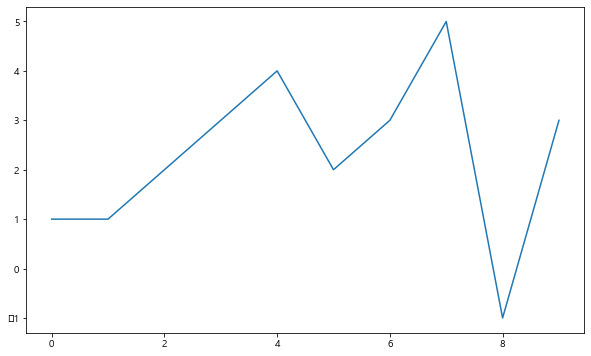

In [51]:
# 예시 기본 형태
plt.figure(figsize=(10,6))
plt.plot([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 1, 2, 3, 4, 2, 3, 5, -1, 3])
#plt.show() 명령어를 통해 차트를 보여줌
plt.show()

### 삼각함수 그려보기
---
- 여기서는 numpy 모듈의 sin 함수를 사용

- 우리 수업에서는 그래프의 결과가 중요한 경우
- 그래프 그리는 코드를 def()로 작성한다
- 나중에 별도의 셀에서 그림만 나타낼 수 있기 때문

In [42]:
#np.arange(0, 12, 0.01) : 0부터 12까지 범위에 0.01만큼의 간격
t = np.arange(0, 12, 0.01)
y = np.sin(t)

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


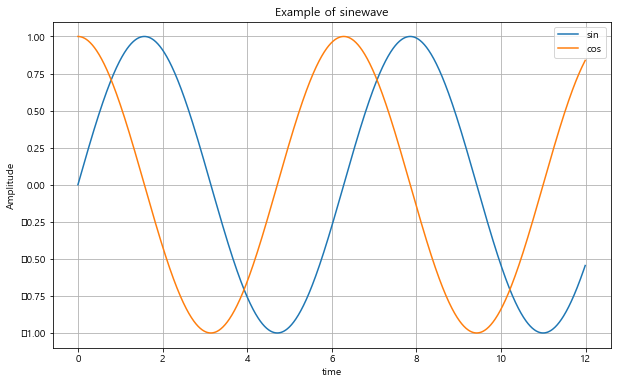

In [43]:
# 함수를 통한 그래프 만들기
def draw_graph():
    # 그래프 사이즈
    plt.figure(figsize=(10, 6))
    # sin 그래프 라벨 이름은 sin으로
    plt.plot(t, np.sin(t), label = "sin")
    # cos 그래프 라벨 이름은 cos로
    plt.plot(t, np.cos(t), label = "cos")
    # 그래프를 격자무늬로
    plt.grid()
    # 라벨을 달아둔 sin과 cos를 잘 보이도록 범례를 만듦
    plt.legend()
    # x축
    plt.xlabel("time")
    # y축
    plt.ylabel("Amplitude")
    # 그래프 제목
    plt.title("Example of sinewave") 
    plt.show()   
draw_graph()

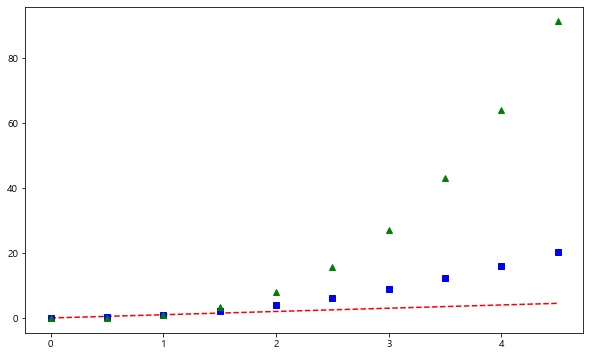

In [44]:
# 옵션을 달아서 만들어보기
t = np.arange(0, 5, 0.5)

def draw_graph():
    # 그래프 사이즈
    plt.figure(figsize=(10, 6))
    plt.plot(t,t, "r--") #r-- 는 빨간색 점선
    plt.plot(t, t ** 2, "bs") # blue squared 모양으로 찍어라
    plt.plot(t, t ** 3, "g^") # green에 위로 뾰족한 삼각형
    plt.show()   
draw_graph()

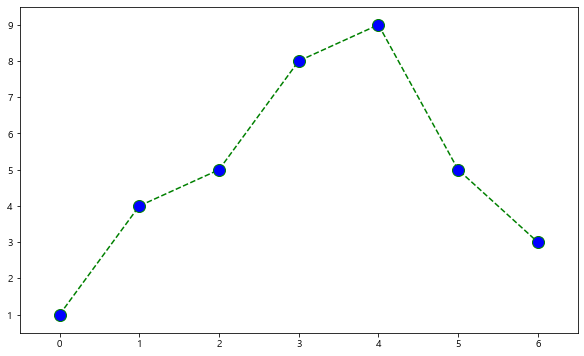

In [45]:
# 다양한 스타일 지정 가능
t = [0, 1, 2, 3, 4, 5, 6]
y = [1, 4, 5, 8, 9, 5, 3]

def draw_graph():
    # 그래프 사이즈
    plt.figure(figsize=(10, 6))
    plt.plot(t,
             y,
             color = "green",
             linestyle= "dashed",
             marker = "o",
             markerfacecolor = "blue",
             markersize = 12,
             )
    # x축 y축 범위
    plt.xlim([-0.5, 6.5])
    plt.ylim([0.5, 9.5])
    plt.show()   
draw_graph()


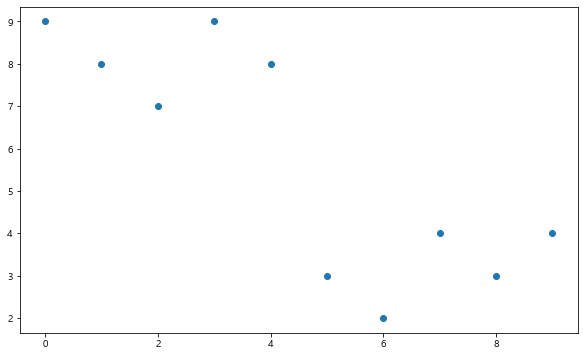

In [46]:
# 산점도 scatter 차트
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
y = np.array([9, 8, 7, 9, 8, 3, 2, 4, 3, 4])

def draw_graph():
    plt.figure(figsize=(10, 6))
    plt.scatter(t, y)
    plt.show()
draw_graph()

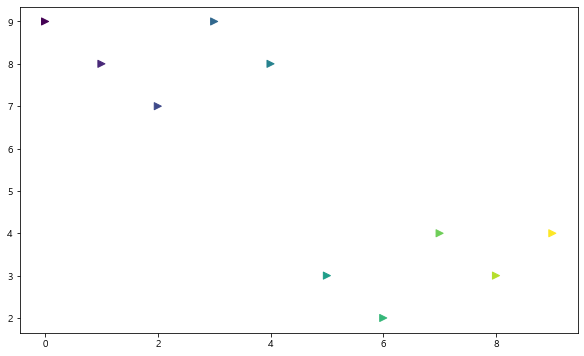

In [47]:
# 산점도의 점 모양도, 철러맵도 사용 가능
colormap = t 


def draw_graph():
    plt.figure(figsize=(10, 6))
    plt.scatter(t, y, s = 50, c= colormap, marker=">")
    plt.colorbar
    plt.show()
draw_graph()

## 15- 16강 CCTV 데이터 시각화
---
예제 4 판다스에서 plot 그리기

In [48]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율
구별,,,,,,,,,
강남구,3238,150.619195,561052,556164,4888,65060,0.871220,11.596073,0.577130
강동구,1010,166.490765,440359,436223,4136,56161,0.939234,12.753458,0.229358
강북구,831,125.203252,328002,324479,3523,56530,1.074079,17.234651,0.253352
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773
관악구,2109,149.290780,520929,503297,17632,70046,3.384722,13.446362,0.404854


<AxesSubplot:ylabel='구별'>

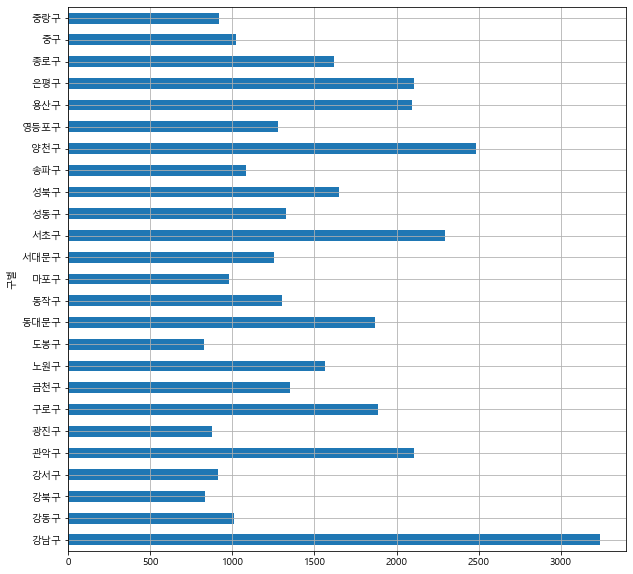

In [49]:
'''
bar 차트 그리기
판다스 데이터 프레임은 데이터 변수에서 바로 plot() 명령을 사용 가능
데이터(컬럼)이 많은 경우 정렬 한 후 그리는 것이 효과적
'''
# 정렬 안한채로
data_result["소계"].plot(kind = "barh", grid= True, figsize = (10,10))

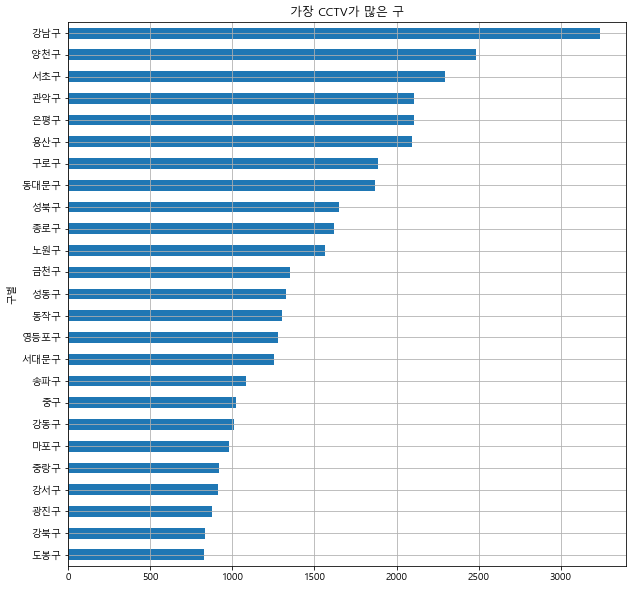

In [52]:
# cctv 수를 기준으로 정렬해서
def draw_graph():
    data_result["소계"].sort_values().plot(
        kind = "barh",
        grid = True,
        title = "가장 CCTV가 많은 구",
        figsize = (10, 10)
        
    )
draw_graph()

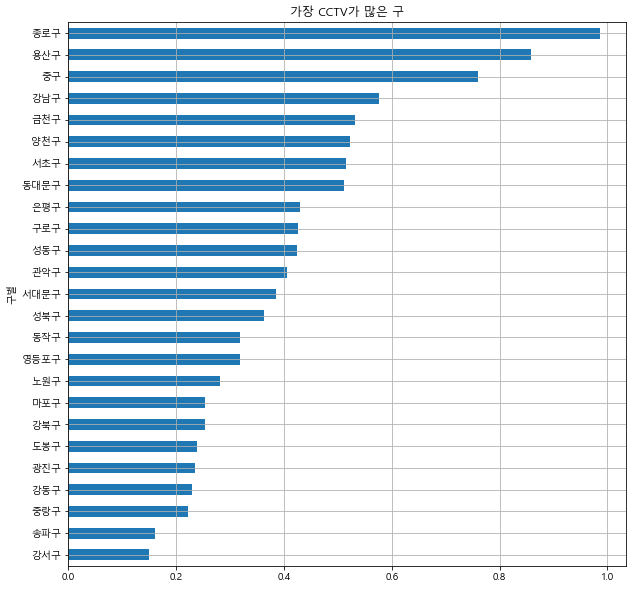

In [50]:
# cctv 비율을 기준으로 정렬해서 
def draw_graph():
    data_result["CCTV비율"].sort_values().plot(
        kind = "barh",
        grid = True,
        title = "가장 CCTV가 많은 구",
        figsize = (10, 10)
        
    )
draw_graph()

## 17-18강. CCTV 데이터 경향 그려보자
---
- 단순 CCTV수와 인구대비 CCTV 비율이 다 다름
- 전달하기가 어려움
- 선형회귀 분석을 통해 해당 데이터의 트렌드를 파악해보자

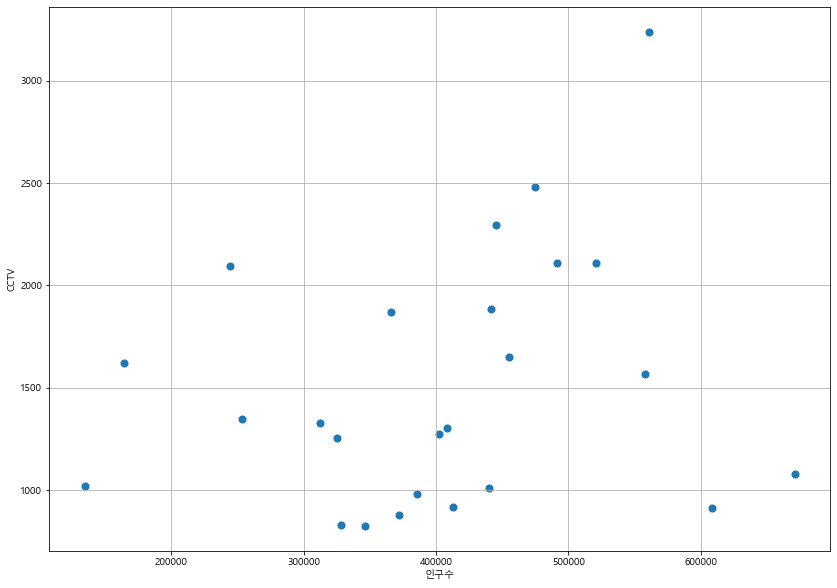

In [54]:
# 산점도로 그려보기
def draw_graph():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["소계"], s= 50)
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid()
    plt.show()
draw_graph()

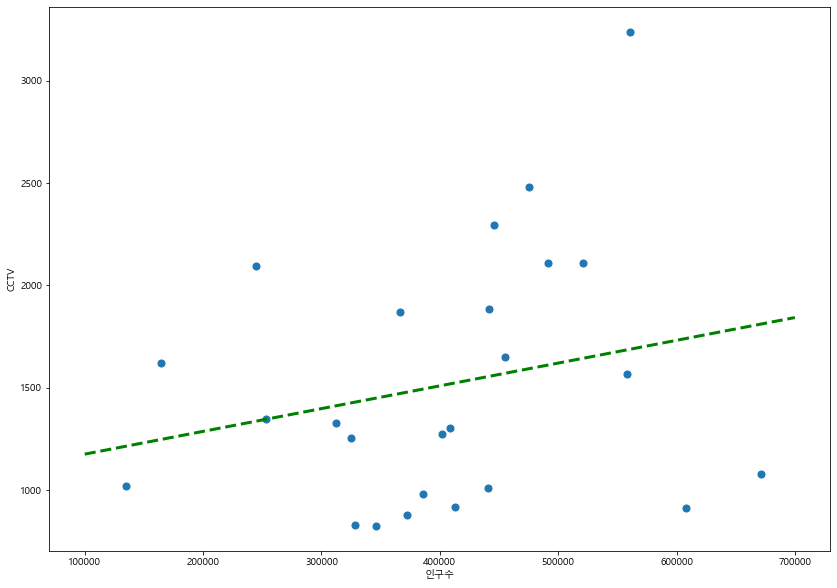

In [59]:
# 선형회귀분석을 위한 준비
# numpy를 이용한 1차 직선 만들기
'''
np.polyfit : 직선 구성하기 위한 계수 계산
np.poly1d : polyfit으로 찾은 계수로 python에서 사용할 함수로 만들어줌
'''
# polyfit을 이용해 찾음
fp01 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
fp01
# 함수 만들기
f01 = np.poly1d(fp01)
# 인구가 40만인 구에서 서울시 전체 경향에 맞는 적당한 cctv 수를 알고싶다면?
f01(400000)

# 경향선 그리기
'''
경향선을 그리기 위해 x 데이터를 생성함
np.linspace(a, b, n) : a부터 b까지 n개의 등간격 데이터 생성 
'''
fx = np.linspace(100000, 700000, 100)
# 함수 차트 만들기
def draw_graph():
    plt.figure(figsize=(14, 10))
    plt.scatter(data_result["인구수"], data_result["소계"], s = 50)
    plt.plot(fx, f01(fx), ls="dashed", lw= 3, color = "g")
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.grid
    plt.show
draw_graph()
    


## 18-20 강 경향에서 벗어난 데이터 강조하기
### 그래프 다듬기
---
- 경향과 오차 만들기
- 경향은 f01 함수에 인구수 
- 현재 값 : data_result["소계"]

In [60]:
# polyfit을 이용해 찾음
fp01 = np.polyfit(data_result["인구수"], data_result["소계"], 1)
fp01
# 함수 만들기
f01 = np.poly1d(fp01)
# linspace를 통해서 만들기
fx = np.linspace(100000, 700000, 100)
# 오차 컬럼을 만듦
data_result["오차"] = data_result["소계"] - f01(data_result["인구수"])
# 경향과 비교해서 데이터의 오차가 너무 많이 나는 데이터를 계산
df_sort_f = data_result.sort_values(by= "오차", ascending=False)
df_sort_t = data_result.sort_values(by= "오차", ascending=True)

In [62]:
# df_sort_f.head()를 통해 경향대비 cctv를 많이 가진 구를 보여줌
df_sort_f.head()
# df_sort_t.head()를 통해 경향대비 cctv를 적게 가진 구를 보여줌
df_sort_t.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강서구,911,134.793814,608255,601691,6564,76032,1.079153,12.500021,0.149773,-830.268578
송파구,1081,104.347826,671173,664496,6677,76582,0.994825,11.410173,0.161061,-730.205628
도봉구,825,246.638655,346234,344166,2068,53488,0.597284,15.448512,0.238278,-625.016861
중랑구,916,79.960707,412780,408226,4554,59262,1.103251,14.356800,0.221910,-607.986645
광진구,878,53.228621,372298,357703,14595,43953,3.920247,11.805865,0.235833,-600.988527


In [63]:
from matplotlib.colors import ListedColormap
# color map을 사용자 정의로 세팅하기 위함
color_step = ["#e74c3c", "#2ecc71", 
              "95a5a6", "#2ecc71", "#3498db","#3498db" ]
my_cmap = ListedColormap(color_step)

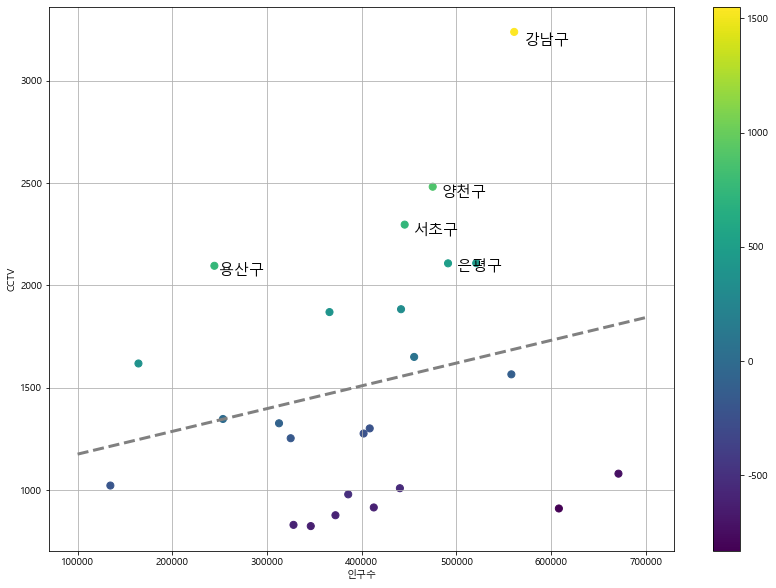

In [64]:
# 함수화
'''
plt.scatter 속 내용 설명
x값은 인구수, y값은 소계
s는 마커의 크기
c는 color 세팅에 방금 계산한 경향과의 오차를 적용
cmap는 사용자 정의한 맵을 적용한 것

for 문 설명
오차가 큰 데이터 아래 위로 5개씩만 특별히 마커 옆에서 구 이름을 명시함
plt.text() 내용 설명
text: 그래프에 글자를 그리도록 하는 명령
사용 방법 : plt.text(X,Y,text, 설정)
x, y에 각각 1.02와 0.98을 곱한 이유: 구 이름이 마커에 겹치지 않도록 살짝 거리를 두기 위함

'''
def draw_graph():
    plt.figure(figsize=(14, 10))

    plt.scatter(data_result["인구수"], data_result["소계"], c=data_result["오차"], s = 50)
    plt.plot(fx, f01(fx), ls="dashed", lw= 3, color = "grey")
    
    for n in range(5):
        plt.text(
            df_sort_f["인구수"][n] * 1.02,
            df_sort_f["소계"][n] * 0.98,
            df_sort_f.index[n],
            fontsize = 15
        )
    
    plt.xlabel("인구수")
    plt.ylabel("CCTV")
    plt.colorbar()
    plt.grid()
    plt.show()
draw_graph()


In [65]:
# 데이터 저장
data_result.to_csv("../data/20220222_cctv_result.csv", sep=",", encoding="utf-8")
    